In [242]:
#Import Python Packages
#from google.colab import drive
#drive.mount('/content/drive/')

from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [243]:
import sklearn as skl
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from scipy import stats
from sklearn import preprocessing
from sklearn import tree
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import preprocessing


In [244]:
#Read training data file
trainfile = r'/gdrive/My Drive/CIS508/Santander_Customer_TRAIN.csv'
trainData = pd.read_csv(trainfile)

#Read test data file
testfile = r'/gdrive/My Drive/CIS508/Santander_Customer_TEST.csv'
testData = pd.read_csv(testfile)

trainData.head()
#print("=======")
testData.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,...,saldo_medio_var5_hace3,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2.43,6.00,4.80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.10
1,5,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2.55,3.00,2.85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.72
2,6,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,60.0,60.0,60.0,60.0,60.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,57.00,51.45,66.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.95
3,7,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.61
4,9,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3.87,30.00,21.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.73


In [245]:
 # To get (Number of Rows, Number of Columns) of a data frame we use DataFrame.shape 
print(trainData.shape)
print(testData.shape)

(76020, 371)
(75818, 370)


In [246]:
#Understanding the Columns
trainData.info

<bound method DataFrame.info of            ID  var3  var15  ...  saldo_medio_var44_ult3       var38  TARGET
0           1     2     23  ...                     0.0   39205.170       0
1           3     2     34  ...                     0.0   49278.030       0
2           4     2     23  ...                     0.0   67333.770       0
3           8     2     37  ...                     0.0   64007.970       0
4          10     2     39  ...                     0.0  117310.979       0
...       ...   ...    ...  ...                     ...         ...     ...
76015  151829     2     48  ...                     0.0   60926.490       0
76016  151830     2     39  ...                     0.0  118634.520       0
76017  151835     2     23  ...                     0.0   74028.150       0
76018  151836     2     25  ...                     0.0   84278.160       0
76019  151838     2     46  ...                     0.0  117310.979       0

[76020 rows x 371 columns]>

In [247]:
# To check number of null values
trainData.isna().sum()

ID                         0
var3                       0
var15                      0
imp_ent_var16_ult1         0
imp_op_var39_comer_ult1    0
                          ..
saldo_medio_var44_hace3    0
saldo_medio_var44_ult1     0
saldo_medio_var44_ult3     0
var38                      0
TARGET                     0
Length: 371, dtype: int64

In [248]:
# To check basic statistics of a data set, column wise
trainData.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,...,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.0,76020.0,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000,7.602000e+04,7.602000e+04,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,7.602000e+04,76020.000000,76020.0,76020.000000,76020.000000,7.602000e+04,7.602000e+04,7.602000e+04,7.602000e+04,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,3.160715,68.803937,113.056934,68.205140,113.225058,137.242763,68.618087,113.792410,140.403479,5.477676,0.011458,0.003762,0.0,0.0,0.958024,0.663760,0.000105,0.000026,0.032833,0.028598,0.067522,0.045462,0.052249,0.042936,0.041476,0.010168,0.009997,0.000026,0.000026,0.050855,...,1077.256756,1048.856447,68.275452,9.505287,124.620962,110.026575,3.997023e+03,613.534443,5.703008e+03,4.401002e+03,3639.419939,556.184178,4852.261814,3857.848542,771.227449,162.170439,9.569502e+02,7.509563e+02,0.175324,0.0,0.513023,0.344174,9.117181e+01,3.646318e+01,1.310316e+02,1.092169e+02,0.213071,0.001910,0.253907,0.186630,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,95.268204,319.605516,512.154823,531.897917,950.086398,697.712596,535.473750,953.578624,712.767240,465.391149,0.106425,0.061221,0.0,0.0,0.200535,0.472425,0.010258,0.005129,0.178202,0.166674,0.250925,0.208316,0.222531,0.202714,0.199390,0.100325,0.099486,0.005129,0.005129,0.219703,...,9614.906985,8189.948852,1733.838226,519.389157,2205.249804,1935.305713,3.777314e+04,9292.752726,4.620254e+04,3.550718e+04,26359.174223,7182

In [249]:
#To get list of names of all Columns from a dataframe
TrainCols = list(trainData.columns.values)
print(TrainCols)

['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1', 'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1', 'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1', 'imp_op_var40_efect_ult3', 'imp_op_var40_ult1', 'imp_op_var41_comer_ult1', 'imp_op_var41_comer_ult3', 'imp_op_var41_efect_ult1', 'imp_op_var41_efect_ult3', 'imp_op_var41_ult1', 'imp_op_var39_efect_ult1', 'imp_op_var39_efect_ult3', 'imp_op_var39_ult1', 'imp_sal_var16_ult1', 'ind_var1_0', 'ind_var1', 'ind_var2_0', 'ind_var2', 'ind_var5_0', 'ind_var5', 'ind_var6_0', 'ind_var6', 'ind_var8_0', 'ind_var8', 'ind_var12_0', 'ind_var12', 'ind_var13_0', 'ind_var13_corto_0', 'ind_var13_corto', 'ind_var13_largo_0', 'ind_var13_largo', 'ind_var13_medio_0', 'ind_var13_medio', 'ind_var13', 'ind_var14_0', 'ind_var14', 'ind_var17_0', 'ind_var17', 'ind_var18_0', 'ind_var18', 'ind_var19', 'ind_var20_0', 'ind_var20', 'ind_var24_0', 'ind_var24', 'ind_var25_cte', 'ind_var26_0', 'ind_var26_cte', 'ind_var26', 'ind_var25_0', 'ind_var2

In [250]:
Xtrain = np.asarray( trainData.drop(["TARGET","ID"],axis=1))
Ytrain = preprocessing.StandardScaler().fit(Xtrain).transform(Xtrain)
print(Xtrain.shape)

Ytrain = np.asarray(trainData['TARGET'])
print(Ytrain.shape)

(76020, 369)
(76020,)


In [251]:
# Split dataset
X_train, X_test, Y_train, Y_test = train_test_split(Xtrain, Ytrain, test_size=0.3, stratify =Ytrain, random_state =4)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)




Train set: (53214, 369) (53214,)
Test set: (22806, 369) (22806,)


In [254]:
# Initialising Decision Tree Algorithm and fitting the model on train set
clf = DecisionTreeClassifier(
                       criterion="entropy",
                           max_depth=10,
                           max_leaf_nodes=20,splitter='random',class_weight='balanced')
clf.fit(X_train, Y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=10, max_features=None,
                       max_leaf_nodes=20, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=None,
                       splitter='random')

In [255]:
# check accuracy on training set
X_Pred_train = clf.predict(X_train)
#Model Accuracy
print("TRAIN Accuracy:",metrics.accuracy_score(Y_train,X_Pred_train))

# check accuracy on test set
X_Pred_test = clf.predict(X_test)
#Model Accuracy on test set
print("TEST Accuracy:", metrics.accuracy_score(Y_test,X_Pred_test))

TRAIN Accuracy: 0.6244597286428384
TEST Accuracy: 0.6184775936157152


In [256]:
# Actual VS Predicted Matrix
print(metrics.confusion_matrix(Y_train, X_Pred_train))
print()

#Print Classification Report
print('Printing the precision and recall, among other metrics')
print(metrics.classification_report(Y_test, X_Pred_test))

[[31475 19633]
 [  351  1755]]

Printing the precision and recall, among other metrics
              precision    recall  f1-score   support

           0       0.99      0.61      0.75     21904
           1       0.08      0.80      0.14       902

    accuracy                           0.62     22806
   macro avg       0.53      0.71      0.45     22806
weighted avg       0.95      0.62      0.73     22806



In [257]:
#Get Class Prediction probabilities as a data frame 
pred=pd.DataFrame(clf.predict(Xtrain),columns=["Target"])
pred.head()

,Target
0,1
1,0
2,0
3,1
4,0


In [258]:
#Get Prediction Probability for the predicted class as a dataframe 
pred_Probability =pd.DataFrame(clf.predict_proba(X_train))

pred_Probability.head()

,0,1
0,0.732360,0.267640
1,0.336262,0.663738
2,0.158775,0.841225
3,0.655410,0.344590
4,0.427573,0.572427


In [259]:
sub = clf.predict_proba(Xtrain)
print(sub)
submission= pd.DataFrame(sub)

[[0.42757273 0.57242727]
 [0.94936483 0.05063517]
 [0.93766671 0.06233329]
 ...
 [0.93766671 0.06233329]
 [0.80737099 0.19262901]
 [0.15877502 0.84122498]]


In [260]:
# Concatenate Class Prediction and Class prediction probability
pd.concat([pred,pred_Probability],axis=1).to_csv("/gdrive/My Drive/CIS508/assignment1_results.csv", index = None)

res=pd.read_csv('/gdrive/My Drive/CIS508/assignment1_results.csv')
res.head()

,Target,0,1
0,1,0.732360,0.267640
1,0,0.336262,0.663738
2,0,0.158775,0.841225
3,1,0.655410,0.344590
4,0,0.427573,0.572427


In [261]:
#Visualize decision tree
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_63 <= 0.43
|   |--- feature_1 <= 36.90
|   |   |--- feature_151 <= 1.61
|   |   |   |--- class: 1
|   |   |--- feature_151 >  1.61
|   |   |   |--- class: 1
|   |--- feature_1 >  36.90
|   |   |--- feature_62 <= 0.84
|   |   |   |--- feature_12 <= 904.76
|   |   |   |   |--- class: 0
|   |   |   |--- feature_12 >  904.76
|   |   |   |   |--- class: 1
|   |   |--- feature_62 >  0.84
|   |   |   |--- class: 1
|--- feature_63 >  0.43
|   |--- feature_1 <= 24.55
|   |   |--- feature_275 <= 3.59
|   |   |   |--- feature_278 <= 1.57
|   |   |   |   |--- class: 0
|   |   |   |--- feature_278 >  1.57
|   |   |   |   |--- class: 0
|   |   |--- feature_275 >  3.59
|   |   |   |--- class: 0
|   |--- feature_1 >  24.55
|   |   |--- feature_38 <= 0.77
|   |   |   |--- feature_15 <= 1432.93
|   |   |   |   |--- feature_49 <= 0.48
|   |   |   |   |   |--- feature_1 <= 28.16
|   |   |   |   |   |   |--- feature_1 <= 25.13
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |

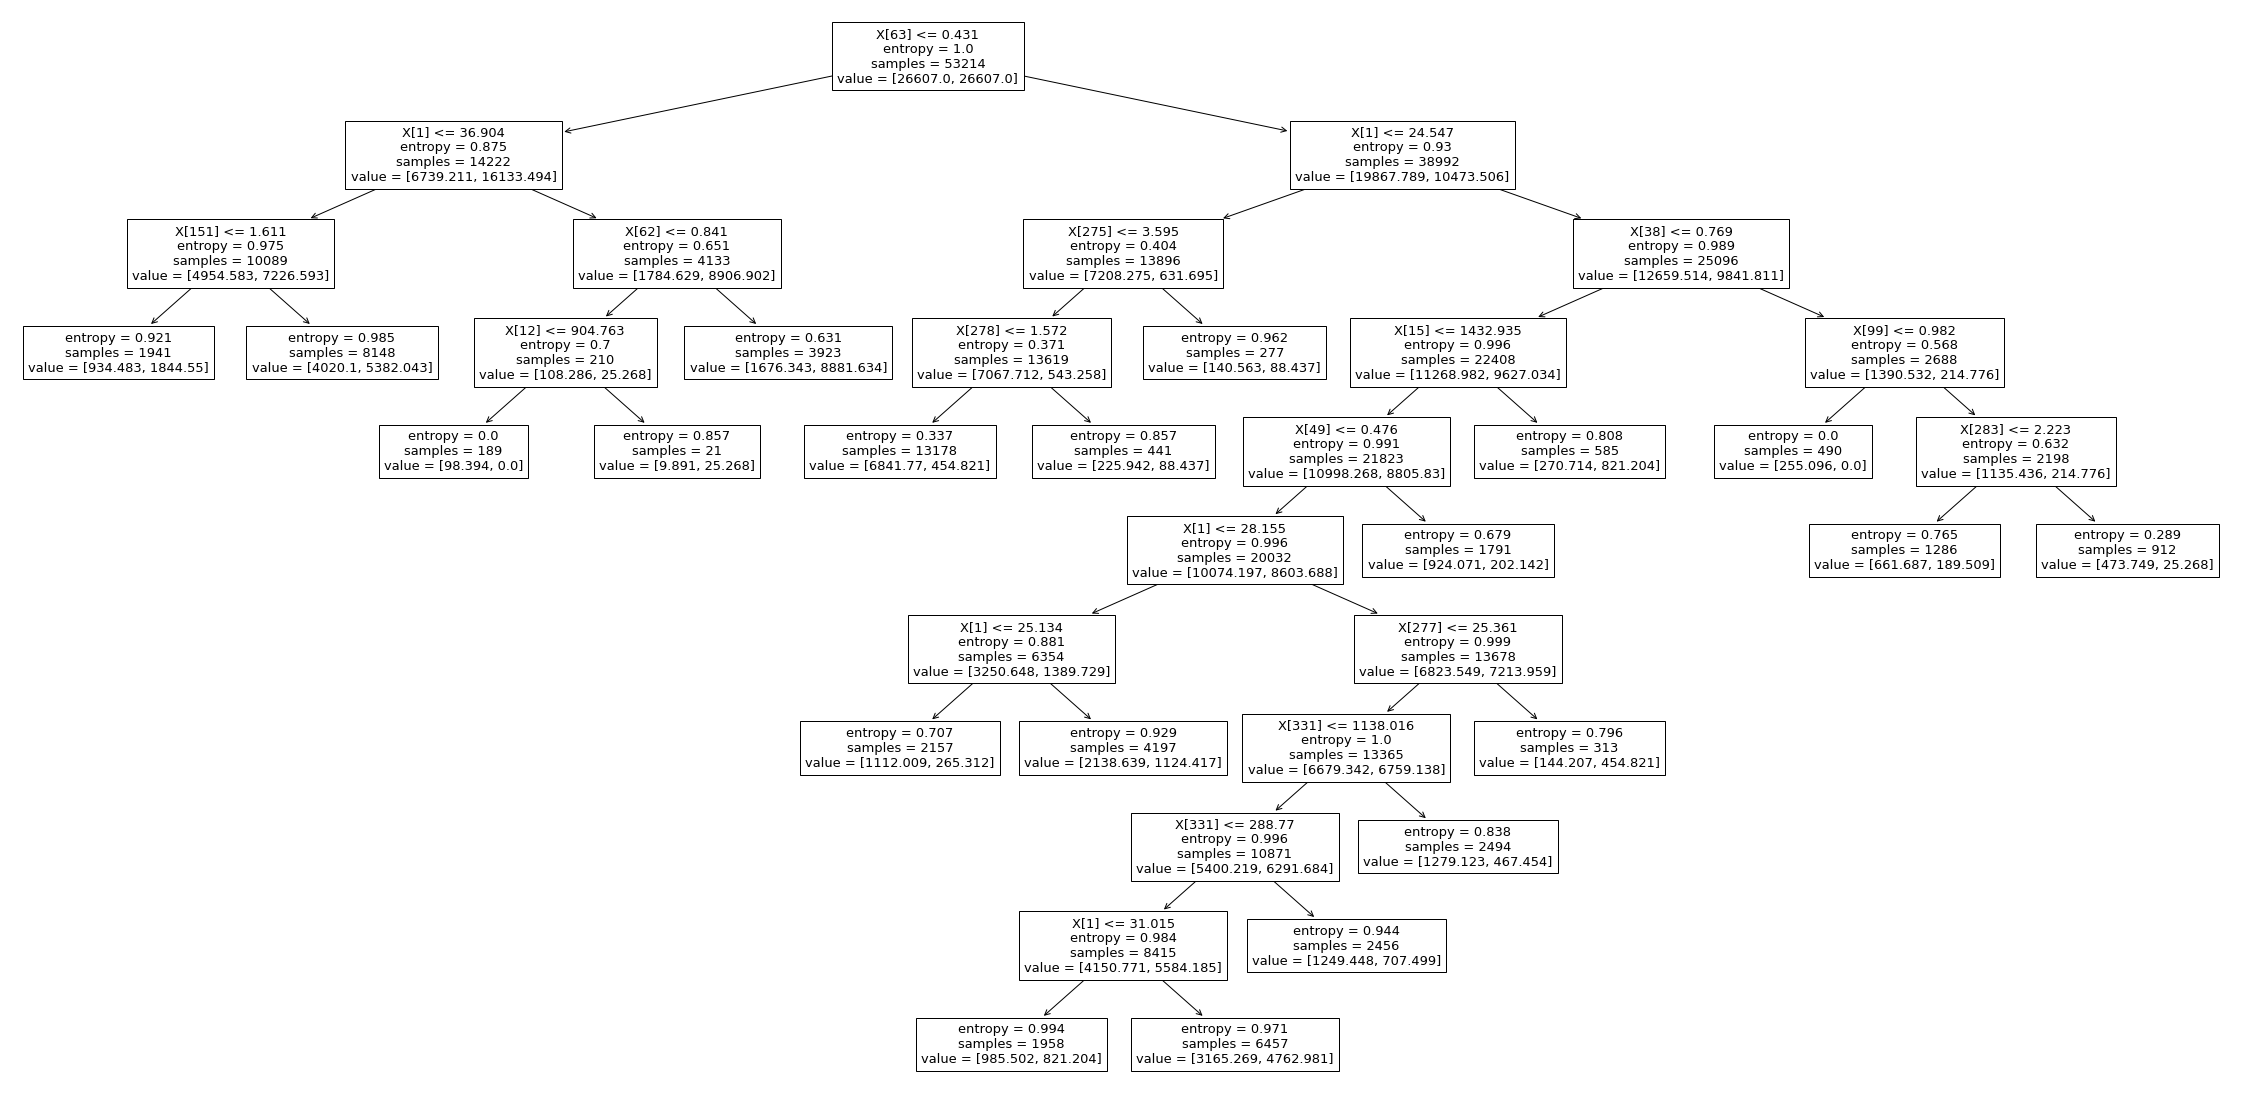

In [262]:
# Plot the decision tree

from matplotlib import pyplot as plt

fig = plt.figure(figsize=(40,20))
_ = tree.plot_tree(clf)

In [263]:
# Drop ID from test Data
testData_id = testData.ID
Test_X = np.asarray( testData.drop('ID', axis=1))
Test_X = preprocessing.StandardScaler().fit(Test_X).transform(Test_X)
print(Test_X.shape)

(75818, 369)


In [264]:
# calculate test probability for the model
probs = clf.predict_proba(Test_X)
pred = clf.predict(Test_X)

print(pred.transpose())

[0 0 0 ... 0 0 0]


In [265]:
# Export the data to CSV file
submission =pd.DataFrame({"ID":testData_id,"TARGET":pred})

In [267]:
submission.to_csv("/submission9_sumit.csv",index=False)